### Final proyect: Trophic state of the lakes of the "Lagunas de Montebello" National Park, Mexico. 

#### Introduction

#####
The “Lagunas de Montebello” National Park (LMNP), Chiapas, Mexico, is a lake system known for its crystal clear waters, it was declared a protected natural area in 1959 and acknowledged as Ramsar Site 1325 in 2003 (Gonzalez-del Castillo, 2003).
This lake system has a karstic origin, which has allowed the formation of approximately 59 lakes. Because of this characteristic, the lakes are influenced by groundwater flow (Olea-Olea, 2018). The lakes that make up this system can be divided, depending on their location, into plateau lakes (northwest section), and mountain lakes (southeast section) (Alcocer et al., 2018).
It has been reported, that plateau lakes present signs of eutrophication such as change of water color to greenish, unpleasant odors, cyanobacterial blooms and even fauna deaths, while mountain lakes have remained pristine (CONANP, 2011; Alcocer et al., 2018; Alvarado et al., 2022). Plateau lakes are fed superficially by the main river of the basin water and connected by surface and underground water flow, thus, are more at risk in terms of nutrient enrichment. Although mountain lakes are also connected through underground, since deep mountain lakes are situated at a slightly higher elevation (Alcocer et al. 2016; Alcocer 2018), their susceptibility to eutrophication processes is significantly lower.
For this project, the physicochemical parameters of some plateau and mountain lakes will be analyzed to determine if there is a difference between them. 


#### Method
#####
As part of an investigation about cyanobacterial blooms in the lakes, seven plateau lakes and three mountain lakes were sampled three times during a year, spanning the dry season, the beginning of the rainy season and the end of the rainy season. The parameters measured were pH, temperature, conductivity (K25, µS/cm), turbidity (FNU), dissolved oxygen (OD, mg/L), total nitrogen (TN, mg/L) and total phosphorous (TP, mg/L).

A pairplot will be used to visualize the relationship between the variables. On the other hand, the statistical difference between plateau and mountain lakes will be determined by applying a t-test for each parameter. In addition, a PCA will be performed to determine the principal components. For this, the following code was used. 

In [1]:
#Install packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np



In [67]:
# ==========================

# 1. Load data

df = pd.read_excel("DB_Lakes.xlsx")

In [68]:
# ===========================

# 2. Data Cleaning / Preprocessing

# a. Check missing values
print(df.isnull().sum())

Lake      0
Type      0
Season    0
pH        0
T         0
K25       0
TDS       0
Turb      0
DO        0
TN        0
NO3       0
NH4       0
TP        0
PO4       0
dtype: int64


In [69]:
# b. Convert categorical columns to category dtype
df["Type"] = df["Type"].astype("category")
df["Season"] = df["Season"].astype("category")

In [70]:
# ========================

# 3. Summary Statistics

# a. Overall summary
print(df.describe())

              pH          T          K25         TDS       Turb         DO  \
count  27.000000  27.000000    27.000000   27.000000  27.000000  27.000000   
mean    7.347222  22.792711   466.969753  347.129630  10.252191   7.983827   
std     0.333983   2.151816   225.362819  171.985777   9.329966   1.962313   
min     6.755000  19.066667   184.700000  124.666667   0.000000   1.930000   
25%     7.153333  20.667667   268.550000  178.500000   0.133333   6.993333   
50%     7.393333  23.166667   422.633333  336.000000   9.946667   8.856667   
75%     7.496667  24.900000   608.983333  471.000000  17.388333   9.620000   
max     8.300000  25.656667  1018.033333  713.000000  28.412500  10.136667   

              TN        NO3        NH4         TP        PO4  
count  27.000000  27.000000  27.000000  27.000000  27.000000  
mean    2.501852   2.113519   0.548333   1.620000   0.692407  
std     1.043154   0.672003   0.869863   1.256805   0.947014  
min     1.200000   1.050000   0.010000   0.24

In [71]:
# b. Summary by lake type
print(df.groupby("Type", observed=False).mean(numeric_only=True))

                pH          T         K25         TDS       Turb        DO  \
Type                                                                         
Mountain  7.316806  22.830278  274.238889  185.763889   1.624167  7.973194   
Plateau   7.371556  22.762658  621.154444  476.222222  17.154611  7.992333   

                TN       NO3    NH4       TP       PO4  
Type                                                    
Mountain  1.816667  1.637500  0.155  0.69125  0.285000  
Plateau   3.050000  2.494333  0.863  2.36300  1.018333  


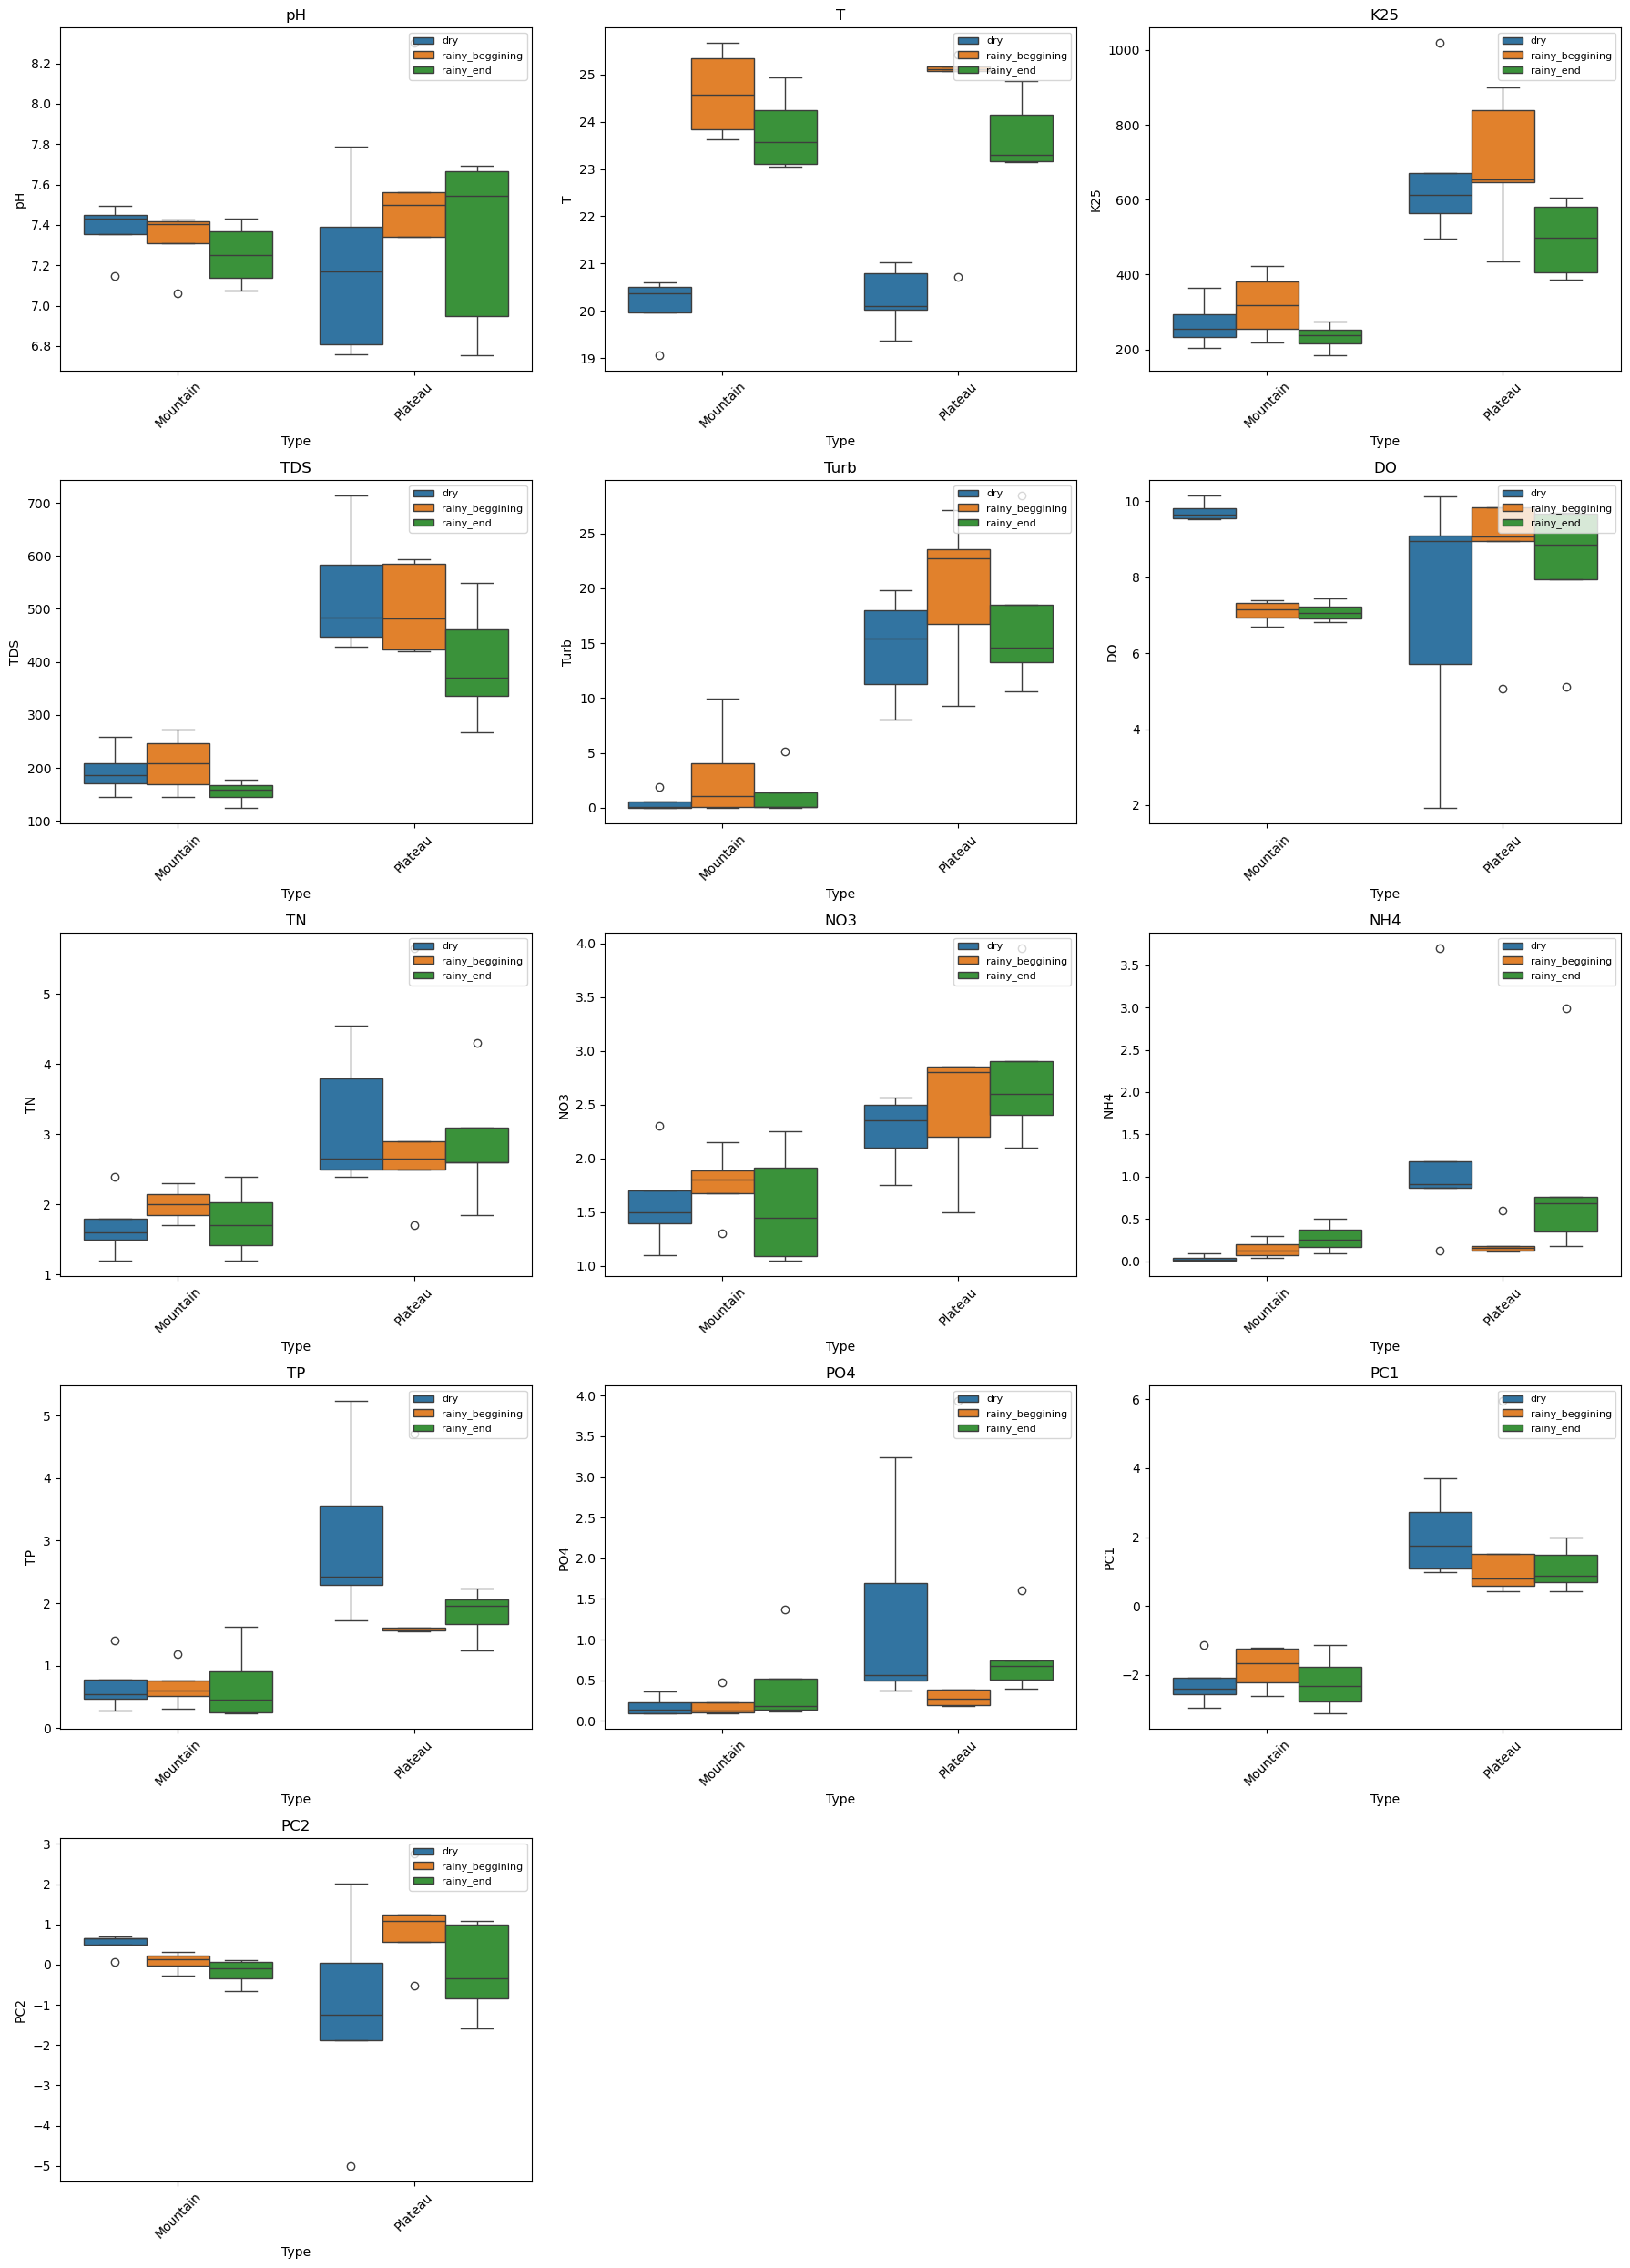

In [ ]:
# ===========================

# 4. Boxplot 
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Grid layout
n_cols = 3
n_rows = int((len(numeric_cols) + n_cols - 1) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

# Flatten axes
axes = axes.flatten()

# Plot each parameter with Type on x-axis and Season as hue
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x="Type", y=col, hue="Season", ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(loc="upper right", fontsize=8)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

In [ ]:
# ===========================

# 5. Statistical Test: T-tests (Plateau vs Mountain)

significant_params = []
t_test_summary = []

for col in df.columns[3:]:
    plateau = df[df["Type"]=="Plateau"][col]
    mountain = df[df["Type"]=="Mountain"][col]
    t_stat, p_val = stats.ttest_ind(plateau, mountain, nan_policy="omit")
    if p_val < 0.05:
        significant_params.append(col)
        t_test_summary.append(f"{col} (t={t_stat:.2f}, p={p_val:.4f})")
    print(f"{col}: t={t_stat:.2f}, p={p_val:.4f}")


pH: t=0.42, p=0.6806
T: t=-0.08, p=0.9372
K25: t=6.22, p=0.0000
TDS: t=8.25, p=0.0000
Turb: t=7.83, p=0.0000
DO: t=0.02, p=0.9805
TN: t=3.74, p=0.0010
NO3: t=4.23, p=0.0003
NH4: t=2.26, p=0.0327
TP: t=4.56, p=0.0001
PO4: t=2.13, p=0.0431


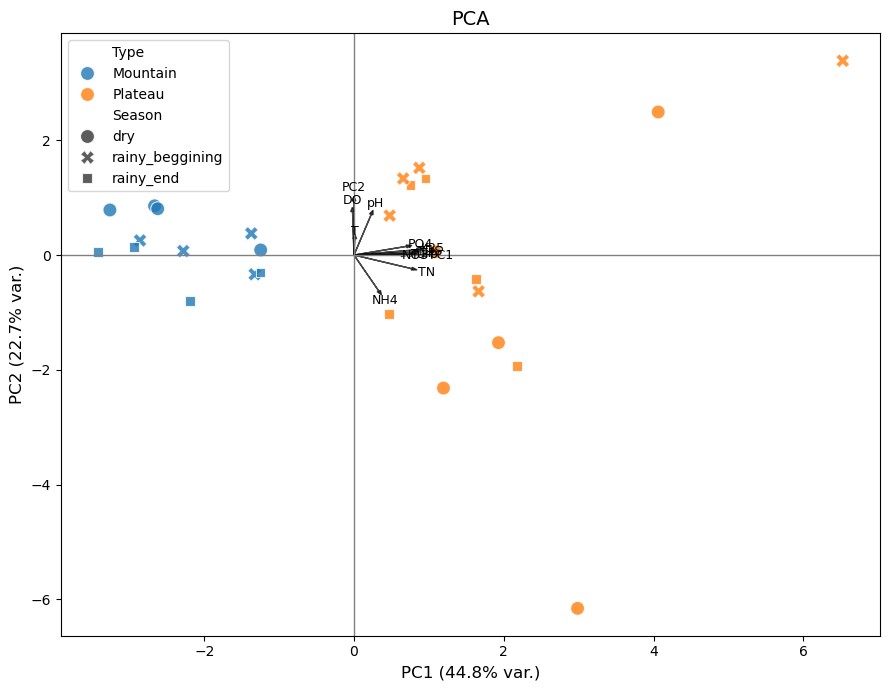

In [76]:
# ===========================

# 6. PCA Biplot

X = df.iloc[:, 3:]  
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_scores = pca.fit_transform(X_scaled)

# Add PC scores to dataframe
df["PC1"] = pca_scores[:, 0]
df["PC2"] = pca_scores[:, 1]

# Get loadings (arrows for variables)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x="PC1", y="PC2",
                hue="Type", style="Season", s=100, alpha=0.8)

# Add arrows for variables
for i, param in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1],
              color="black", alpha=0.7, head_width=0.05, length_includes_head=True)
    plt.text(loadings[i,0]*1.15, loadings[i,1]*1.15, param,
             color="black", ha="center", va="center", fontsize=9)

# Add axis lines
plt.axhline(0, color='grey', linewidth=1)
plt.axvline(0, color='grey', linewidth=1)

# Labels
plt.title("PCA", fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var.)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var.)", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


#### Results and discussion
##### 
With the boxplots is inferred that some parameters are different between plateau and mountain lakes. This was corroborated by the t-test, given that sgnificant differences between plateau and mountain lakes were observed for conductivity (K25), total dissolved solids (TDS), turbidity (Turb), dissolved oxygen (DO), total nitrogen (TN), total phosporous (TP), nitrate (NO3), ammonium (NH4) and phosphates (PO4) differed significantly between lake types (p < 0.05). 

The Principal Component Analysis (PCA) explained approximately 44.8% of the variance in PC1 and 22.7% in PC2. PC1 primarily separated plateau from mountain lakes, with plateau lakes associated with higher values of the same parameters that showed a significant difference with the t-test, whereas mountain lakes were characterized by lower values of the same parameters. High values of this parameters are commonly related to eutrophic waters.

These findings support the statement that plateau lakes are interconnected by superficial and ground water flow, favoring the eutrophication of the lakes. Meanwhile, given that mountain lakes remain pristine, this could be interconnected underground, but aren´t connected to the plateau lakes nor superficial or underground.

#### Conclusion
##### 
The geological and hydrological context of plateau and mountain lakes influence in their trophic state. 

#### References 

Alcocer J, Oseguera L, Sánchez G, González C, Martínez J, González R (2016). Bathymetric and morphometric surveys of the Montebello Lakes, Chiapas. *Journal of Limnology*. 75.

Alcocer J, Merino-Ibarra M, Oseguera LA, Escolero O (2018). Anthropogenic impacts on tropical karst lakes: “Lagunas de Montebello,” Chiapas. *Ecohydrology*, 11, 8, e2029. 

Alvarado J, García-Meneses, PM, Esse, C, Saavedra, P, Morales, R et al. (2022). Spatially explicit vulnerability analysis of contaminant sources in a karstic watershed in southeastern Mexico. *Applied Geography*, 138, 102606. 

CONANP, Comisión Nacional de Áreas Naturales Protegidas. (2011). *Parque Nacional Lagunas de Montebello: monitoreo de parámetros de la calidad del agua*. Comisión Nacional de Áreas Naturales Protegidas. Comitán, Chiapas.
González-del Castillo EC. 2003. Ficha Informativa de los Humedales Ramsar (FIR). Chiapas, México: SEMARNAT, 9.
